### Writing a custom function to drop the correlated features from the DataFrame

### Importing The Data and Required Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('breast_cancer_data.csv')
df=df.drop(['Unnamed: 32'],axis='columns')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Gauging the amount of correlation in the present data among the features.

In [3]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


### Plotting the level of correlation from above w.r.t each feature on a heatmap for better visualisation.

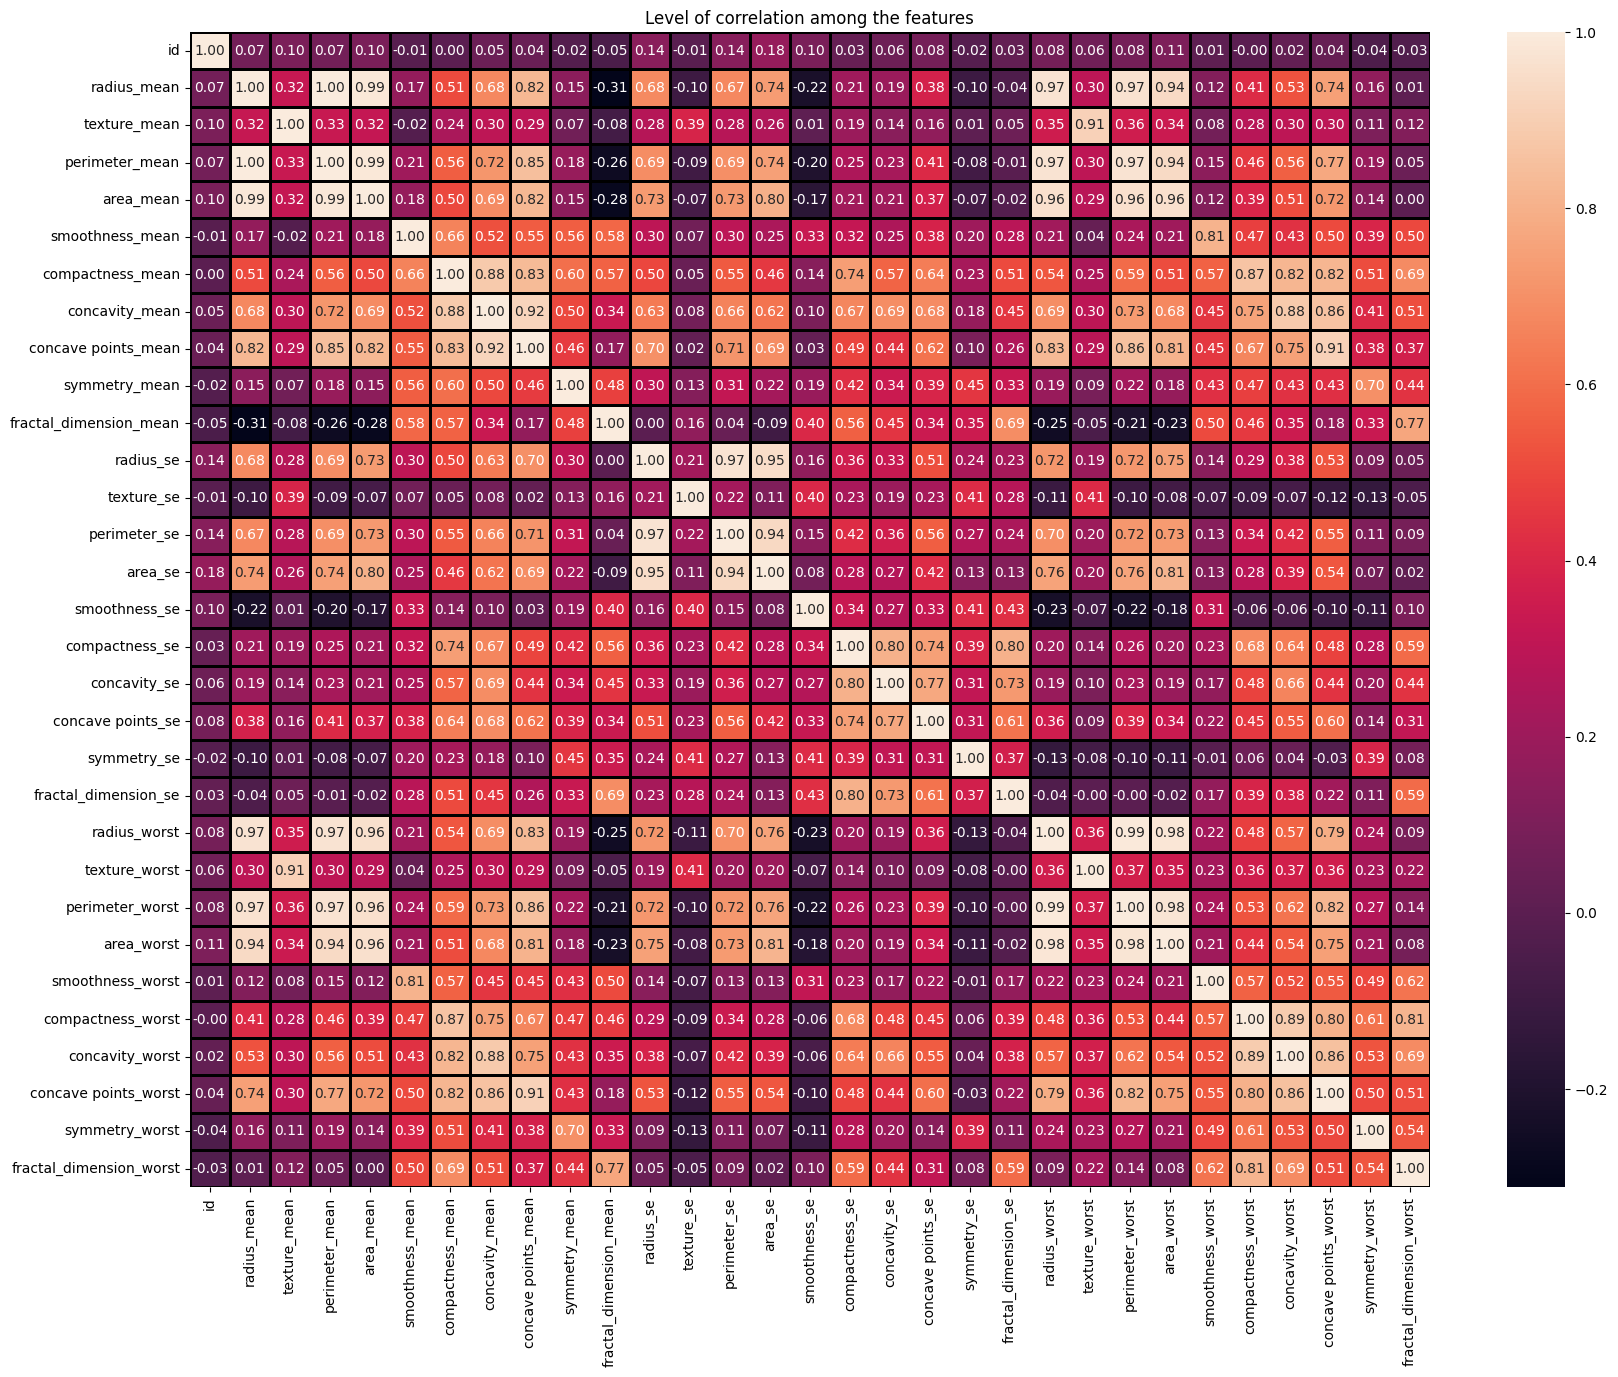

In [4]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='rocket',annot=True,fmt='0.2f',linewidth=1,linecolor='black')
plt.title('Level of correlation among the features')
plt.show()

### Writing a custom function that takes a DataFrame as an input and returns the same dataframe
### after dropping all the correlated features from it

In [5]:
def corr_var(df,y):
    '''
    This is a very robust function that takes a Pandas DataFrame as input and
    drops one of the features whose more than 75% of the data is correlated
    with another feature.
    This is done for all the features w.r.t each other
    until there are no correlated features left,
    finally after dropping all of the correlated columns
    it returns the DataFrame with all the correlated features removed.

    Additionally it also prints the features that are correlated
    to each other, to what degree are they correlated and
    the feature that is going to be dropped out of the two.

    input: DataFrame
    y: y variable
    return: DataFrame without correlated features
    '''
    cor=df.corr()
    try:
        cor1=cor.drop([y],axis='index')
        cor2=cor1.drop([y],axis='columns')
    except KeyError as key:
        cor2=cor
    high_cor={}
    for n in cor2.columns:
        for i in cor2.index:
            if n!=i:
                if cor2.loc[n,i]>0.75 or cor2.loc[n,i]<-0.75:
                    high_cor[cor2.loc[n,i]]=[n,i] # mapping only the unique values of correlation using dictionary(that
                                            # is initialized above as high_cor),
                                            # as dictionary keys takes unique values and simultaneously mapping
                                            # the respective columns and rows
    drop_col=[]
    for a,b in high_cor.items():
        print(f'correlation of {round(a,2)} found in columns "{b[0]}" and "{b[1]}"---> dropping column "{b[0]}"')
        drop_col.append(b[0]) # appending the column names that are to be dropped in list initialized as drop_col
    return df.drop(drop_col,axis='columns')

In [6]:
print(corr_var.__doc__)


    This is a very robust function that takes a Pandas DataFrame as input and
    drops one of the features whose more than 75% of the data is correlated
    with another feature.
    This is done for all the features w.r.t each other
    until there are no correlated features left,
    finally after dropping all of the correlated columns
    it returns the DataFrame with all the correlated features removed.

    Additionally it also prints the features that are correlated
    to each other, to what degree are they correlated and
    the feature that is going to be dropped out of the two.

    input: DataFrame
    y: y variable
    return: DataFrame without correlated features
    


### Testing the function on the present Data

In [7]:
new_df=corr_var(df,'diagnosis')

correlation of 1.0 found in columns "perimeter_mean" and "radius_mean"---> dropping column "perimeter_mean"
correlation of 0.99 found in columns "area_mean" and "radius_mean"---> dropping column "area_mean"
correlation of 0.82 found in columns "concave points_mean" and "radius_mean"---> dropping column "concave points_mean"
correlation of 0.97 found in columns "radius_worst" and "radius_mean"---> dropping column "radius_worst"
correlation of 0.97 found in columns "perimeter_worst" and "radius_mean"---> dropping column "perimeter_worst"
correlation of 0.94 found in columns "area_worst" and "radius_mean"---> dropping column "area_worst"
correlation of 0.91 found in columns "texture_worst" and "texture_mean"---> dropping column "texture_worst"
correlation of 0.99 found in columns "area_mean" and "perimeter_mean"---> dropping column "area_mean"
correlation of 0.85 found in columns "concave points_mean" and "perimeter_mean"---> dropping column "concave points_mean"
correlation of 0.97 found

### We see that there were lot of correlated features in the present data and our function successfully finds them and drops them and finally from the initial data with 32 columns we are only left with 14 columns and checking the level of correlation on the new dataframe we see there are no more highly correlated features.
### To see how exactly the function works please refer to the function documentation above.

### New Dataframe

In [8]:
new_df

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
0,842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.4601
1,842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.2750
2,84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.3613
3,84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.6638
4,84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.2060
565,926682,M,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.2572
566,926954,M,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.2218
567,927241,M,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.02324,0.4087


### Level of correlation in the new dataframe

In [9]:
new_df.corr()

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
id,1.000000,0.074626,0.099770,-0.012968,0.000096,-0.022114,-0.052511,0.143048,-0.007526,0.096781,0.033961,-0.017306,-0.044224
radius_mean,0.074626,1.000000,0.323782,0.170581,0.506124,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,-0.104321,0.163953
texture_mean,0.099770,0.323782,1.000000,-0.023389,0.236702,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.009127,0.105008
smoothness_mean,-0.012968,0.170581,-0.023389,1.000000,0.659123,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.200774,0.394309
compactness_mean,0.000096,0.506124,0.236702,0.659123,1.000000,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.229977,0.510223
symmetry_mean,-0.022114,0.147741,0.071401,0.557775,0.602641,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.449137,0.699826
fractal_dimension_mean,-0.052511,-0.311631,-0.076437,0.584792,0.565369,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.345007,0.334019
radius_se,0.143048,0.679090,0.275869,0.301467,0.497473,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.240567,0.094543
texture_se,-0.007526,-0.097317,0.386358,0.068406,0.046205,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.411621,-0.128215
smoothness_se,0.096781,-0.222600,0.006614,0.332375,0.135299,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.413506,-0.107342


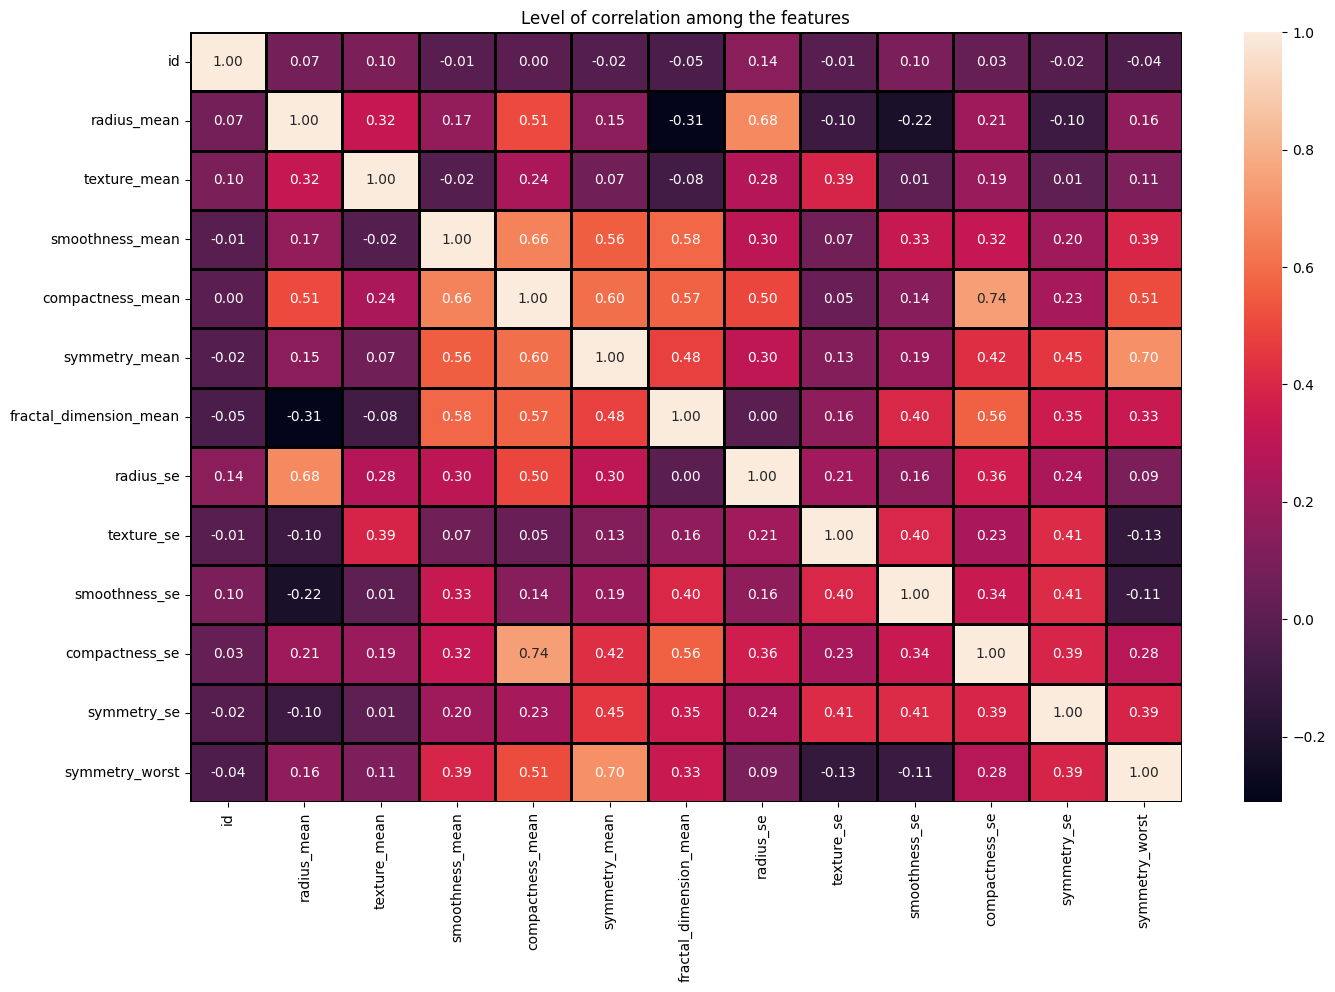

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(new_df.corr(),cmap='rocket',annot=True,fmt='0.2f',linewidth=1,linecolor='black')
plt.title('Level of correlation among the features')
plt.show()